In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 5.0 MB/s eta 0:00:0000:0100:01


In [7]:
# Specify the file path
file_path = '/Users/artashesmatshkalyan/Downloads/healthcare-dataset-stroke-data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first 3 rows
print(df.head(3))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1  


In [8]:
# Missing Data

df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# A really fantsatic and intelligent way to deal with blanks, from Thoman Konstantin in: https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [10]:
print('Missing values: ',sum(df.isnull().sum()))


Missing values:  0


In [11]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

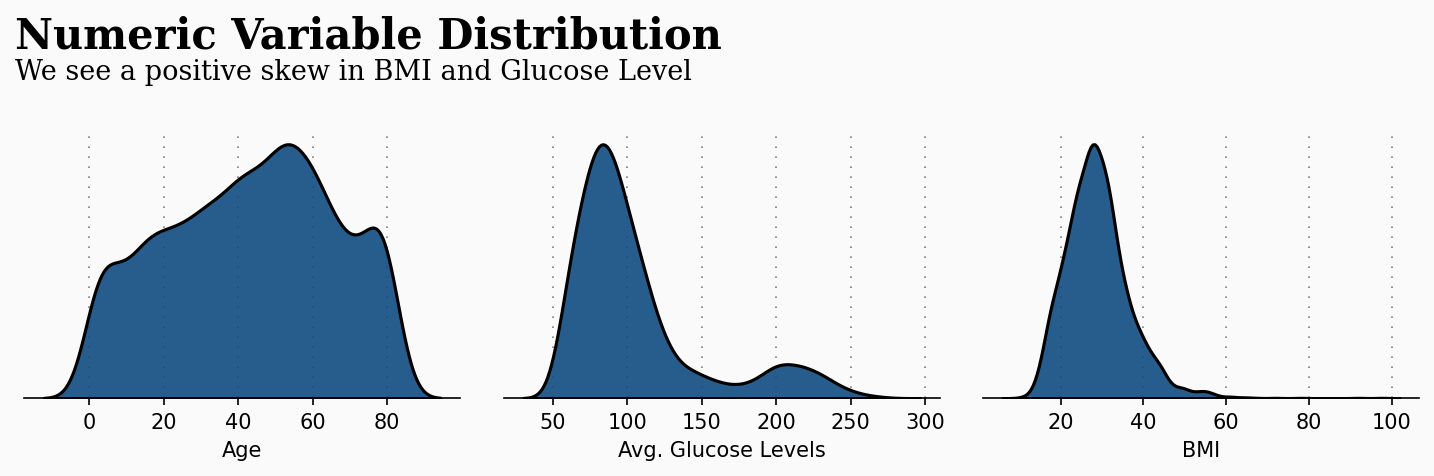

In [12]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()



In [13]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

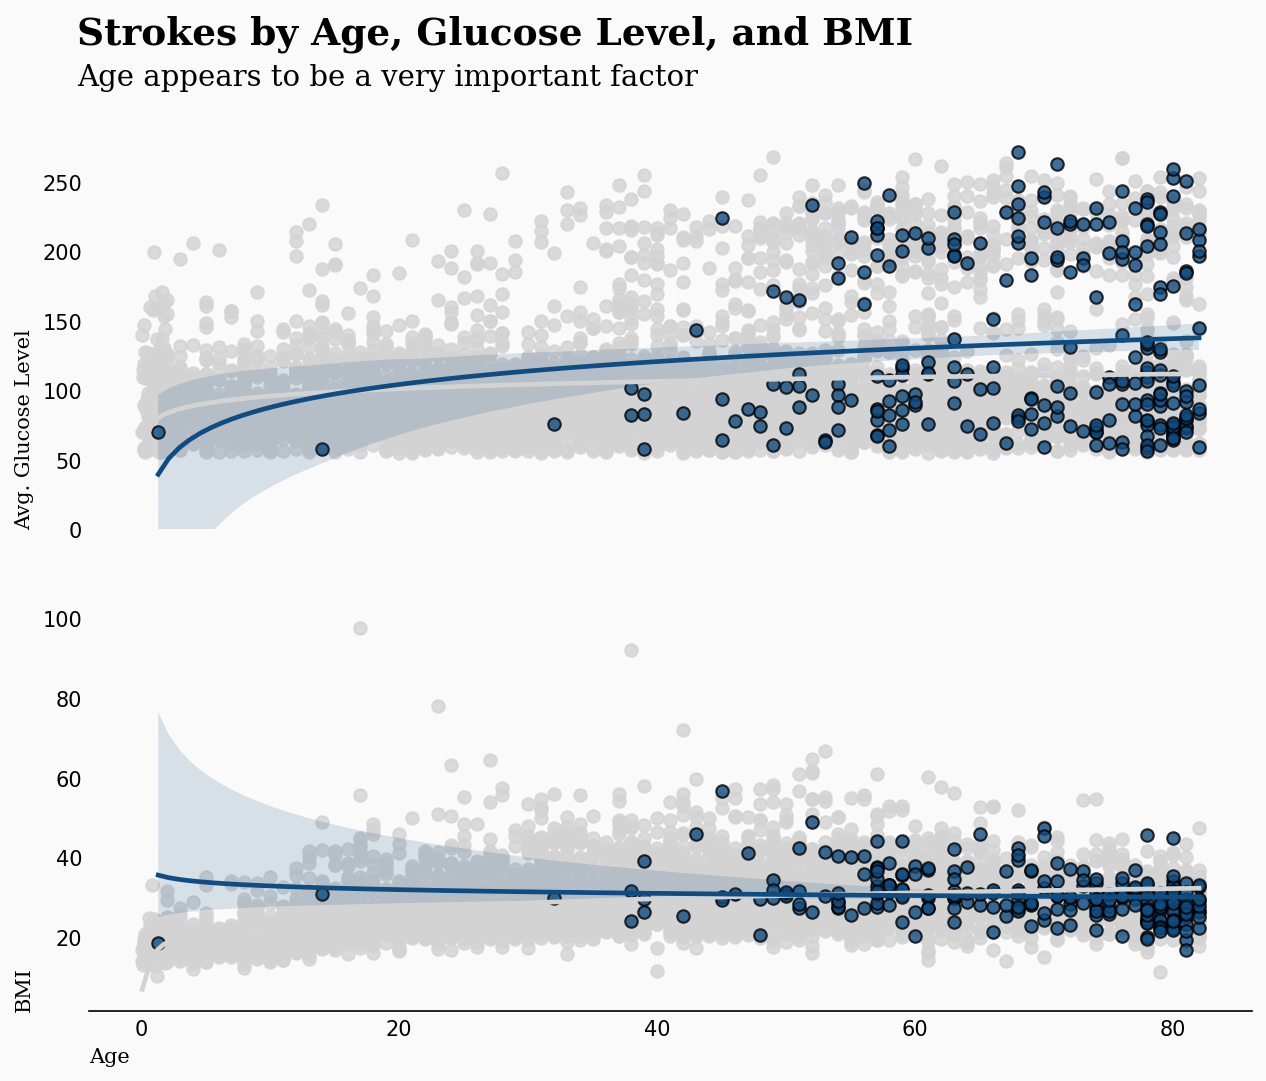

In [14]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,16),dpi=150,facecolor=background_color) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# glucose

sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)


# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()


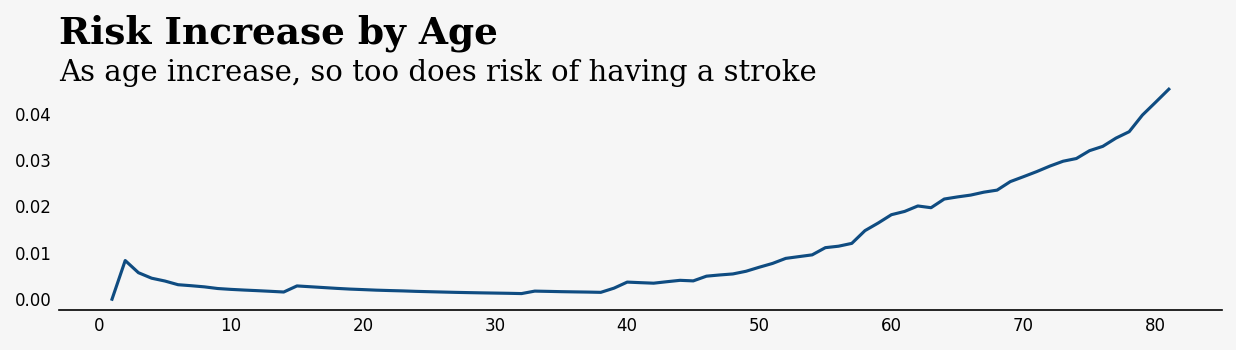

In [16]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

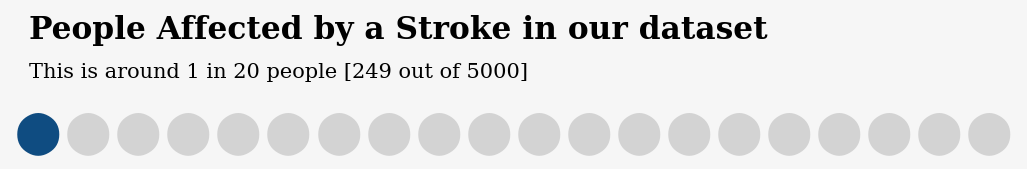

In [17]:
from pywaffle import Waffle

fig = plt.figure(figsize=(7, 2),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=1,
    values=[1, 19],
    colors=['#0f4c81', "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,0.78,'People Affected by a Stroke in our dataset',fontfamily='serif',fontsize=15,fontweight='bold')
fig.text(0.035,0.65,'This is around 1 in 20 people [249 out of 5000]',fontfamily='serif',fontsize=10)

plt.show()

In [18]:
# Drop single 'Other' gender
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

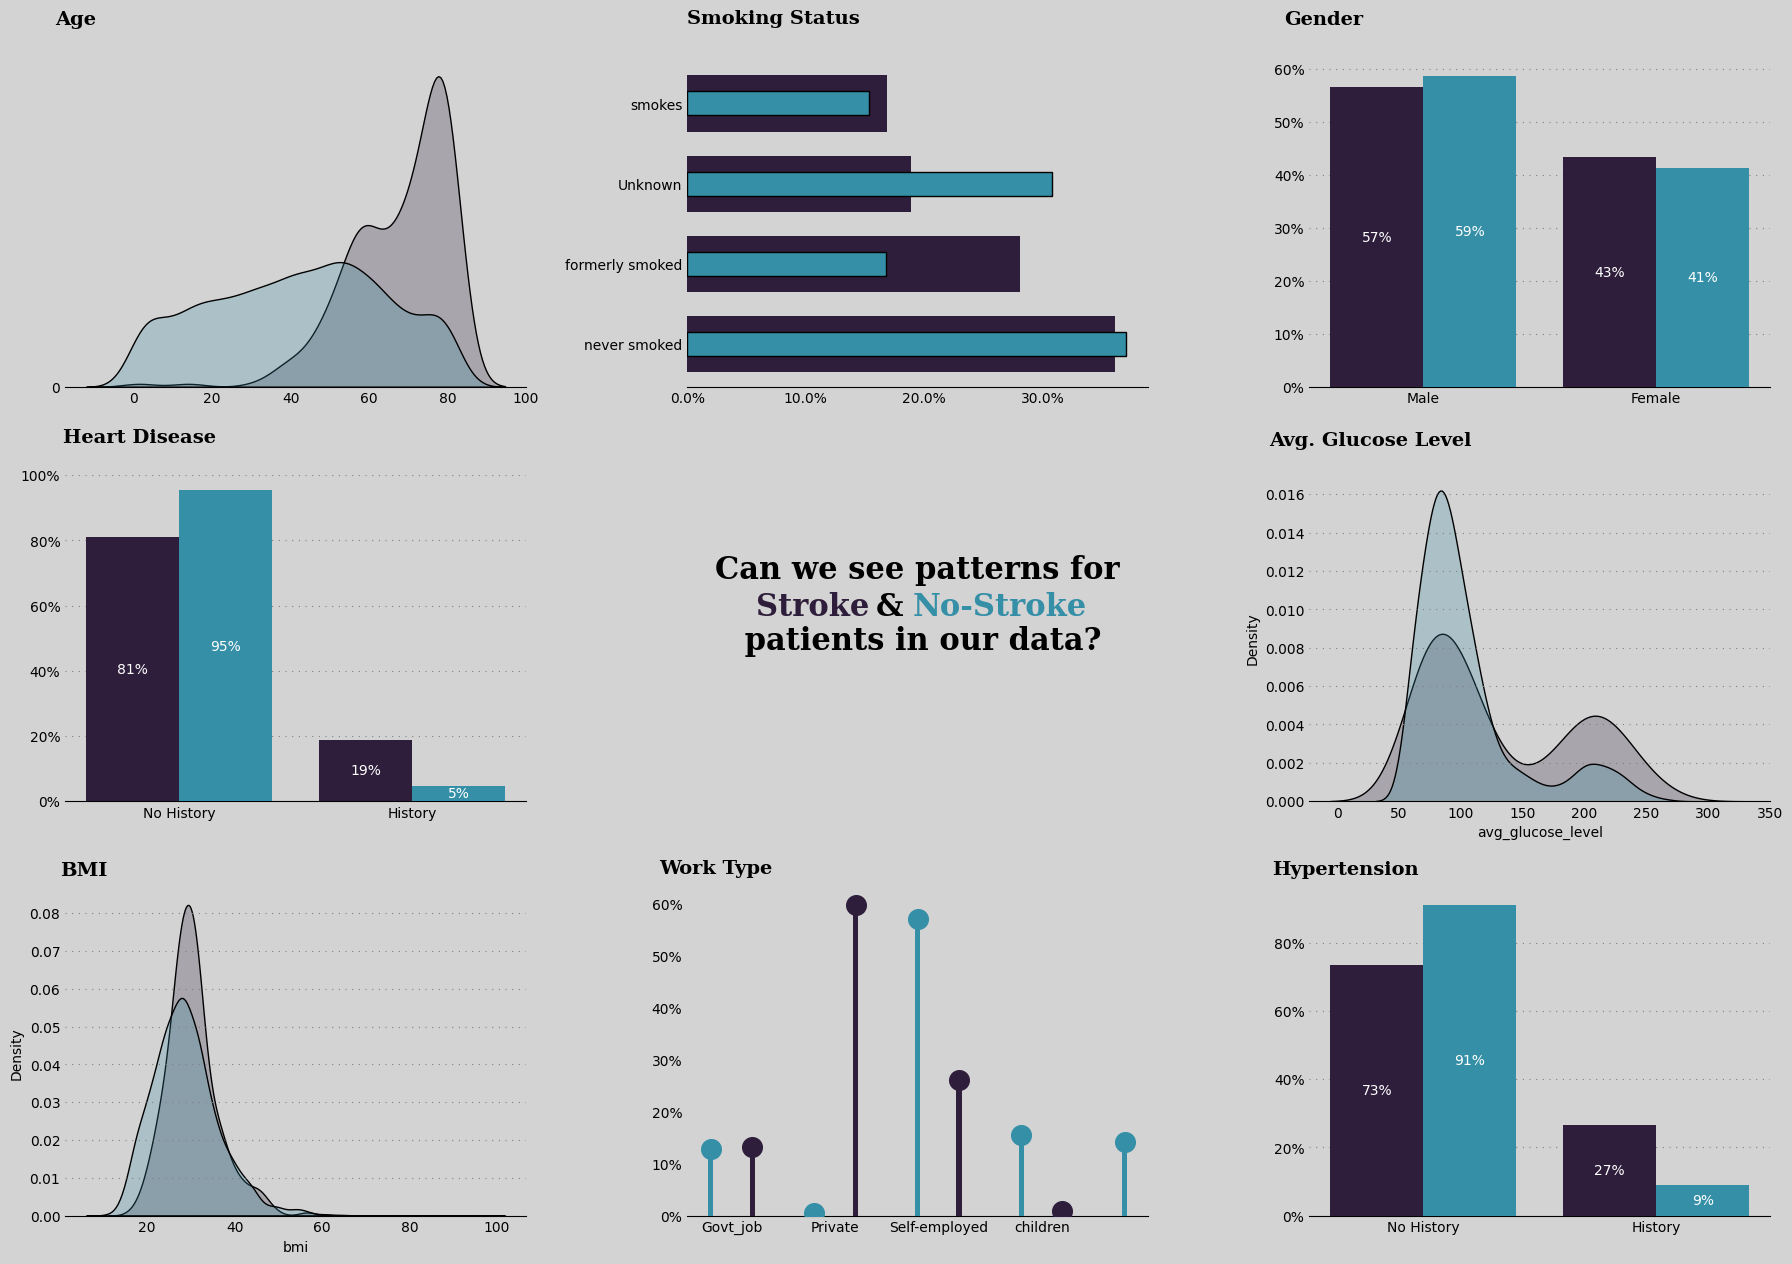

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a modern color scheme using the mako palette from Seaborn
modern_palette = sns.color_palette("mako")

# Updated figure
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

# Set background to light gray and axis labels to black
background_color = "#d3d3d3"  # Light gray
fig.patch.set_facecolor(background_color)  # Set figure background color

# Update axis color to black for visibility
axis_color = "black"
data_label_color = "white"  # Data labels color for bar charts

# Age Plot
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["age"])
negative = pd.DataFrame(no_str_only["age"])
sns.kdeplot(positive["age"], ax=ax0, color=modern_palette[0], shade=True, ec='black', label="positive")
sns.kdeplot(negative["age"], ax=ax0, color=modern_palette[3], shade=True, ec='black', label="negative")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax0.tick_params(axis='x', colors=axis_color)
ax0.tick_params(axis='y', colors=axis_color)

# Smoking Status
positive = pd.DataFrame(str_only["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_str_only["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax1.barh(positive.index, positive['Percentage'], color=modern_palette[0], zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color=modern_palette[3], zorder=3, ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax1.tick_params(axis='x', colors=axis_color)
ax1.tick_params(axis='y', colors=axis_color)

# Gender Plot
positive = pd.DataFrame(str_only["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_str_only["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color=modern_palette[0], width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color=modern_palette[3], width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'], color=axis_color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.tick_params(axis='x', colors=axis_color)
ax2.tick_params(axis='y', colors=axis_color)
# Data labels in white
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')

# Heart Disease
positive = pd.DataFrame(str_only["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_str_only["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color=modern_palette[0], width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color=modern_palette[3], width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'], color=axis_color)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax3.tick_params(axis='x', colors=axis_color)
ax3.tick_params(axis='y', colors=axis_color)
# Data labels in white
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')

# Title
ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color=axis_color)

ax4.text(0.15, 0.57, "Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color=modern_palette[0])
ax4.text(0.41, 0.57, "&", fontweight="bold", fontfamily='serif', fontsize=22, color=axis_color)
ax4.text(0.49, 0.57, "No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color=modern_palette[3])

# Glucose Level
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["avg_glucose_level"])
negative = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5, color=modern_palette[0], ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color=modern_palette[3], ec='black', shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax5.tick_params(axis='x', colors=axis_color)
ax5.tick_params(axis='y', colors=axis_color)

# BMI
ax6.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
positive = pd.DataFrame(str_only["bmi"])
negative = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6, color=modern_palette[0], ec='black', shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color=modern_palette[3], ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax6.tick_params(axis='x', colors=axis_color)
ax6.tick_params(axis='y', colors=axis_color)

# Work Type
positive = pd.DataFrame(str_only["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_str_only["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color=modern_palette[3], width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3, s=200, color=modern_palette[3])
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color=modern_palette[0], width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3, s=200, color=modern_palette[0])

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index), rotation=0, color=axis_color)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax7.tick_params(axis='x', colors=axis_color)
ax7.tick_params(axis='y', colors=axis_color)

# Hypertension
positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color=axis_color)
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color=modern_palette[0], width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color=modern_palette[3], width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'], color=axis_color)
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
ax8.tick_params(axis='x', colors=axis_color)
ax8.tick_params(axis='y', colors=axis_color)
# Data labels in white
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color=data_label_color, horizontalalignment='center', verticalalignment='center')

# Tidy up
for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color)
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].set_facecolor(background_color) 

plt.show()
